# Exploratory Data Analysis (EDA)

This notebook explores and summarizes the datasets:
- **Machine_Settings_Log_01.csv**
- **Production_Log_01.csv**

---

# Imports and Settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

### Load the Data

In [2]:
# Update path if running elsewhere
machine = pd.read_csv('Machine_Settings_Log_01.csv')
production = pd.read_csv('Production_Log_01.csv')

print(f'Machine Settings shape: {machine.shape}')
print(f'Production Log shape: {production.shape}')

Machine Settings shape: (10000, 3)
Production Log shape: (10000, 20)


In [3]:
merged_df = pd.merge(machine, production, on='configuration_log_ID', how='inner')
merged_df.shape

(10000, 22)

In [4]:
merged_df_t = pd.merge(machine, production, on='configuration_log_ID', how='outer')
merged_df_t.shape

(10000, 22)

In [5]:
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   configuration_log_ID  10000 non-null  int64  
 1   gear                  10000 non-null  int64  
 2   rotation_speed        10000 non-null  float64
 3   id                    10000 non-null  int64  
 4   width                 10000 non-null  float64
 5   height                10000 non-null  float64
 6   ionizationclass       10000 non-null  object 
 7   FluxCompensation      10000 non-null  object 
 8   pressure              10000 non-null  float64
 9   karma                 10000 non-null  float64
 10  modulation            10000 non-null  float64
 11  weight_in_kg          10000 non-null  float64
 12  weight_in_g           10000 non-null  float64
 13  error                 10000 non-null  object 
 14  error_type            3365 non-null   object 
 15  Quality             

,configuration_log_ID,gear,rotation_speed,id,width,height,ionizationclass,FluxCompensation,pressure,karma,...,weight_in_g,error,error_type,Quality,reflectionScore,distortion,nicesness,smartness,multideminsionality,roughness
0,1,2,122.121415,1,137.419169,44.326218,C,IV,103.937207,976.538993,...,8.370683e+08,no,NaN,95.489138,703.193051,49.666361,139.496837,2964.217002,no,123.202181
1,2,1,111.977476,2,98.706037,41.619531,A,II,101.177877,1031.806826,...,4.355043e+08,no,NaN,98.262642,663.936149,52.826310,100.380138,2733.298369,yes,111.040858
2,3,1,137.268544,3,117.262568,41.421088,A,III,99.381956,840.246668,...,5.995707e+08,no,NaN,98.472489,674.814037,51.967423,115.995772,2716.279965,no,138.439571
3,4,2,125.719071,4,122.657252,41.202308,A,I,101.833664,964.391122,...,6.498897e+08,no,NaN,97.107023,661.281569,47.626823,121.383895,2694.883523,no,125.939831
4,5,1,134.710713,5,118.085366,43.418485,C,I,95.246304,859.331870,...,6.054444e+08,no,NaN,92.994235,684.026152,47.420237,118.633440,2885.260257,no,135.123613


In [6]:
print(merged_df['error'].value_counts())

error
no     6635
yes    3365
Name: count, dtype: int64


In [7]:
# Show unique values to see what error types exist
print(merged_df['error_type'].unique())


[nan 'severe' 'minor' 'critical']


In [8]:
# Fill missing/empty error_type with a label (e.g., 'No Error')
merged_df['error_type'] = merged_df['error_type'].replace('', pd.NA)
merged_df['error_type'] = merged_df['error_type'].fillna('No Error')

<class 'pandas.core.frame.DataFrame'>
Index: 3365 entries, 8 to 9997
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   configuration_log_ID  3365 non-null   int64  
 1   gear                  3365 non-null   int64  
 2   rotation_speed        3365 non-null   float64
 3   id                    3365 non-null   int64  
 4   width                 3365 non-null   float64
 5   height                3365 non-null   float64
 6   ionizationclass       3365 non-null   object 
 7   FluxCompensation      3365 non-null   object 
 8   pressure              3365 non-null   float64
 9   karma                 3365 non-null   float64
 10  modulation            3365 non-null   float64
 11  weight_in_kg          3365 non-null   float64
 12  weight_in_g           3365 non-null   float64
 13  error                 3365 non-null   object 
 14  error_type            3365 non-null   object 
 15  Quality               3365

/var/folders/lj/36924lnj39380jwmbklmk4hh0000gn/T/ipykernel_2431/254610785.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=errors_df, x='error_type', palette='viridis')


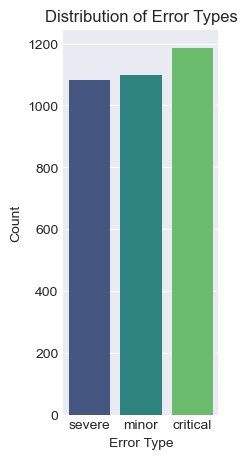

In [9]:
errors_df = merged_df[merged_df['error_type'].isin(['critical', 'severe', 'minor'])]
errors_df.shape
errors_df.info()
# Plotting the distribution of error types
plt.figure(figsize=(2, 5))
sns.countplot(data=errors_df, x='error_type', palette='viridis')
plt.title('Distribution of Error Types')
plt.xlabel('Error Type')
plt.ylabel('Count')
plt.show()

In [10]:
# List of categorical columns (object, category, or bool types)
cat_cols = errors_df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# List of numerical columns (int or float types)
num_cols = errors_df.select_dtypes(include=['number']).columns.tolist()

# If your target column (e.g., 'error_type') is in categorical, but you want to keep it separate:
# cat_cols.remove('error_type')  # if needed

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)


Categorical columns: ['ionizationclass', 'FluxCompensation', 'error', 'error_type', 'multideminsionality']
Numerical columns: ['configuration_log_ID', 'gear', 'rotation_speed', 'id', 'width', 'height', 'pressure', 'karma', 'modulation', 'weight_in_kg', 'weight_in_g', 'Quality', 'reflectionScore', 'distortion', 'nicesness', 'smartness', 'roughness']


In [11]:
# For Error Data Set 
cate_cols = merged_df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# List of numerical columns (int or float types)
nume_cols = merged_df.select_dtypes(include=['number']).columns.tolist()

# If your target column (e.g., 'error_type') is in categorical, but you want to keep it separate:
# cat_cols.remove('error_type')  # if needed

print("Categorical columns:", cate_cols)
print("Numerical columns:", nume_cols)


Categorical columns: ['ionizationclass', 'FluxCompensation', 'error', 'error_type', 'multideminsionality']
Numerical columns: ['configuration_log_ID', 'gear', 'rotation_speed', 'id', 'width', 'height', 'pressure', 'karma', 'modulation', 'weight_in_kg', 'weight_in_g', 'Quality', 'reflectionScore', 'distortion', 'nicesness', 'smartness', 'roughness']


#### EDA For Merged dataset ####

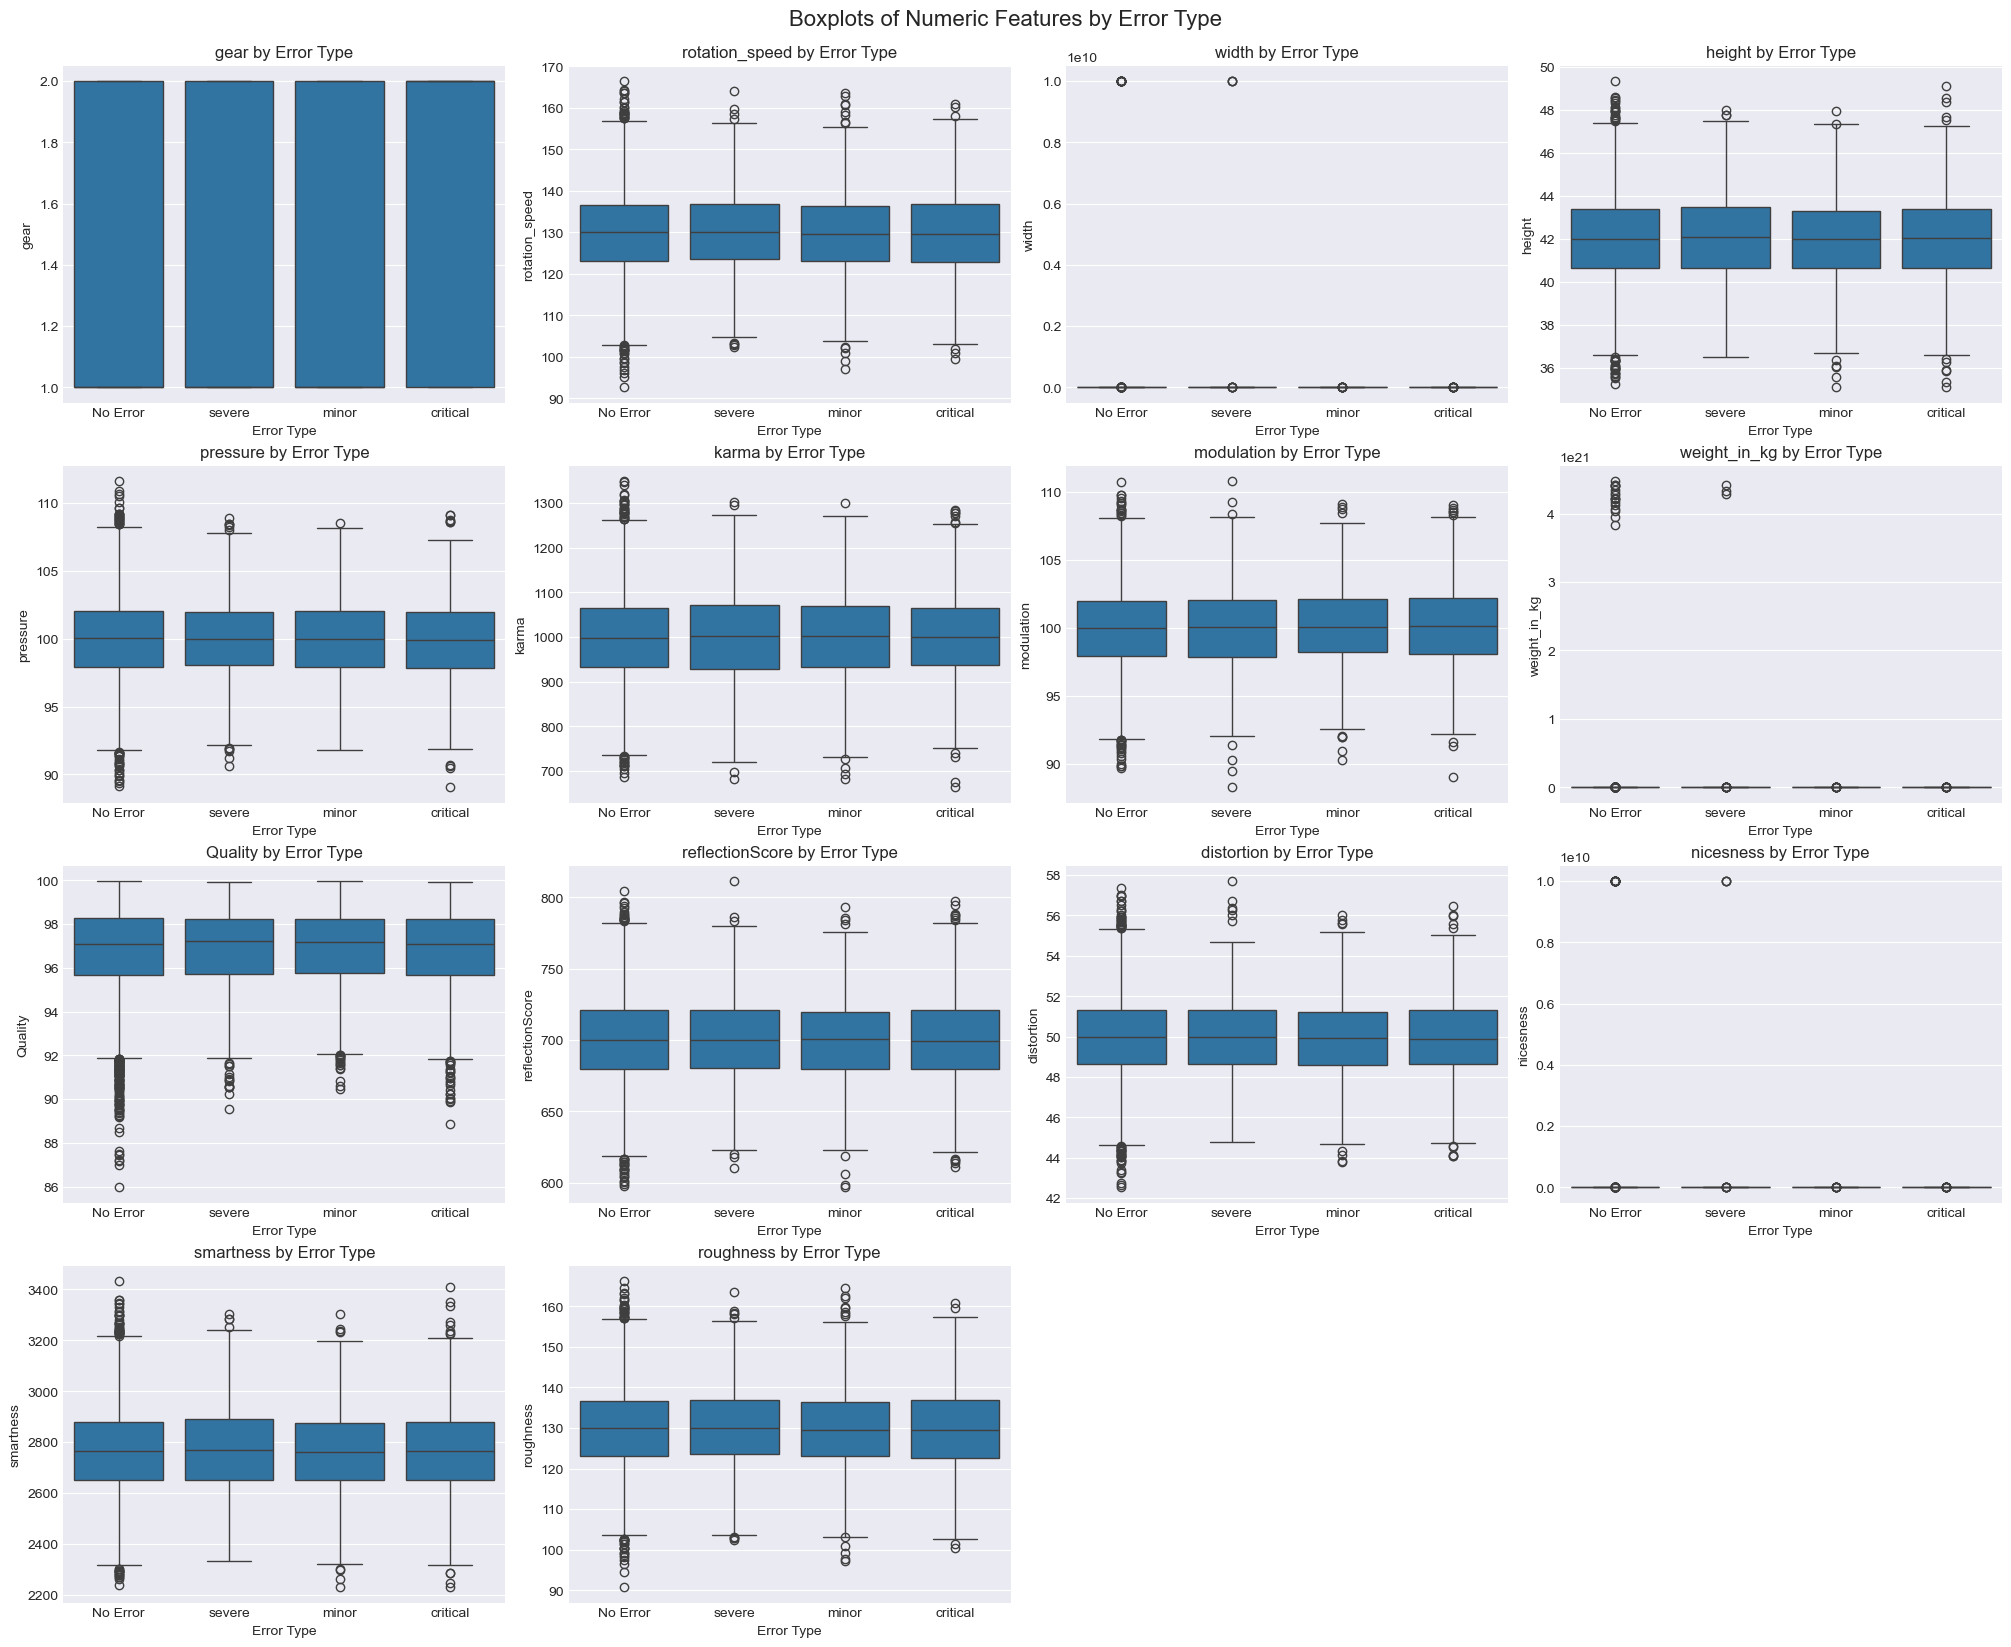

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['gear', 'rotation_speed', 'width', 'height', 'pressure', 'karma', 
                'modulation', 'weight_in_kg', 'Quality', 'reflectionScore', 'distortion', 'nicesness', 'smartness', 'roughness']

# Convert columns to numeric (ignore errors)
for col in numeric_cols:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

n_cols = 4  # Number of boxplots per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4), constrained_layout=True)

for idx, col in enumerate(numeric_cols):
    r, c = divmod(idx, n_cols)
    ax = axes[r, c] if n_rows > 1 else axes[c]
    sns.boxplot(x='error_type', y=col, data=merged_df, ax=ax)
    ax.set_title(f'{col} by Error Type')
    ax.set_xlabel('Error Type')
    ax.set_ylabel(col)

# Hide any unused subplots
for idx in range(len(numeric_cols), n_rows * n_cols):
    r, c = divmod(idx, n_cols)
    fig.delaxes(axes[r, c] if n_rows > 1 else axes[c])

plt.suptitle('Boxplots of Numeric Features by Error Type', y=1.02, fontsize=16)
plt.show()


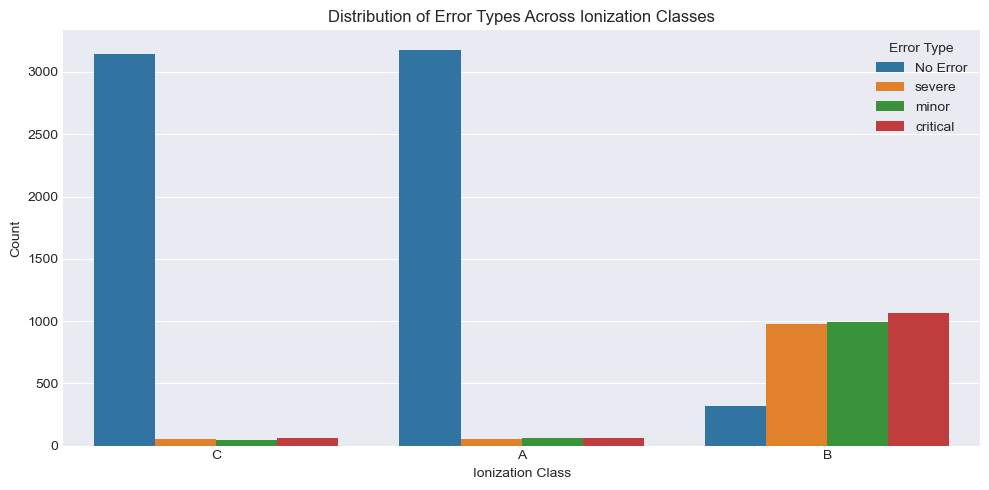

In [13]:

plt.figure(figsize=(10, 5))
sns.countplot(x='ionizationclass', hue='error_type', data=merged_df)
plt.title('Distribution of Error Types Across Ionization Classes')
plt.xlabel('Ionization Class')
plt.ylabel('Count')
plt.legend(title='Error Type')
plt.tight_layout()
plt.show()


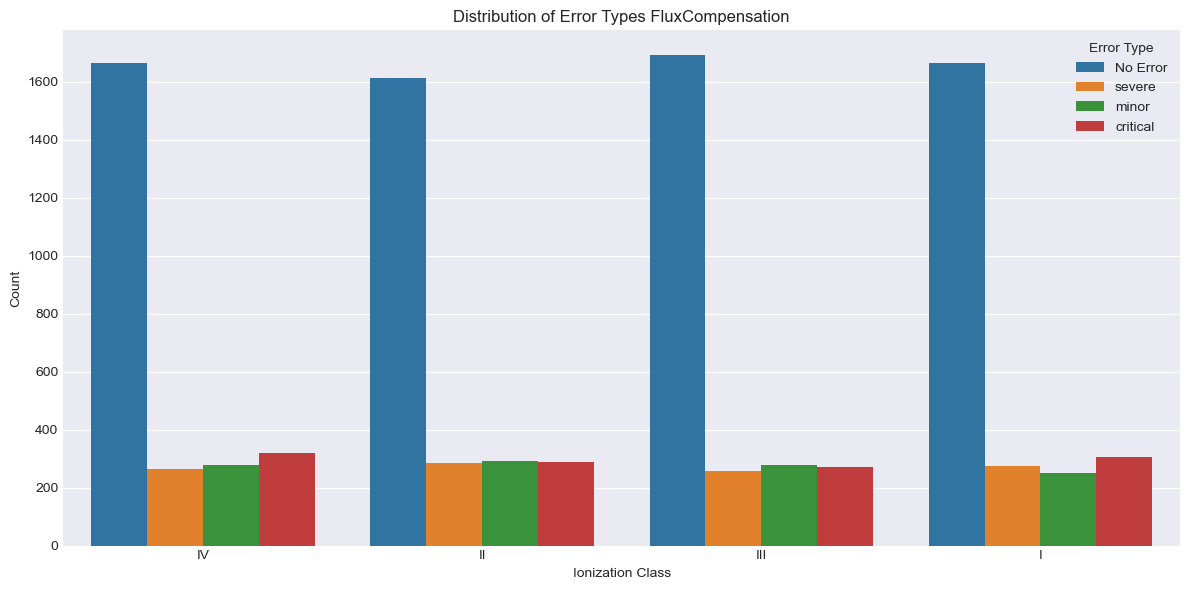

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='FluxCompensation', hue='error_type', data=merged_df)
plt.title('Distribution of Error Types FluxCompensation')
plt.xlabel('Ionization Class')
plt.ylabel('Count')
plt.legend(title='Error Type')
plt.tight_layout()
plt.show()

#### EDA for Error Dataset

/var/folders/lj/36924lnj39380jwmbklmk4hh0000gn/T/ipykernel_2431/1430437641.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors_df[col] = pd.to_numeric(errors_df[col], errors='coerce')


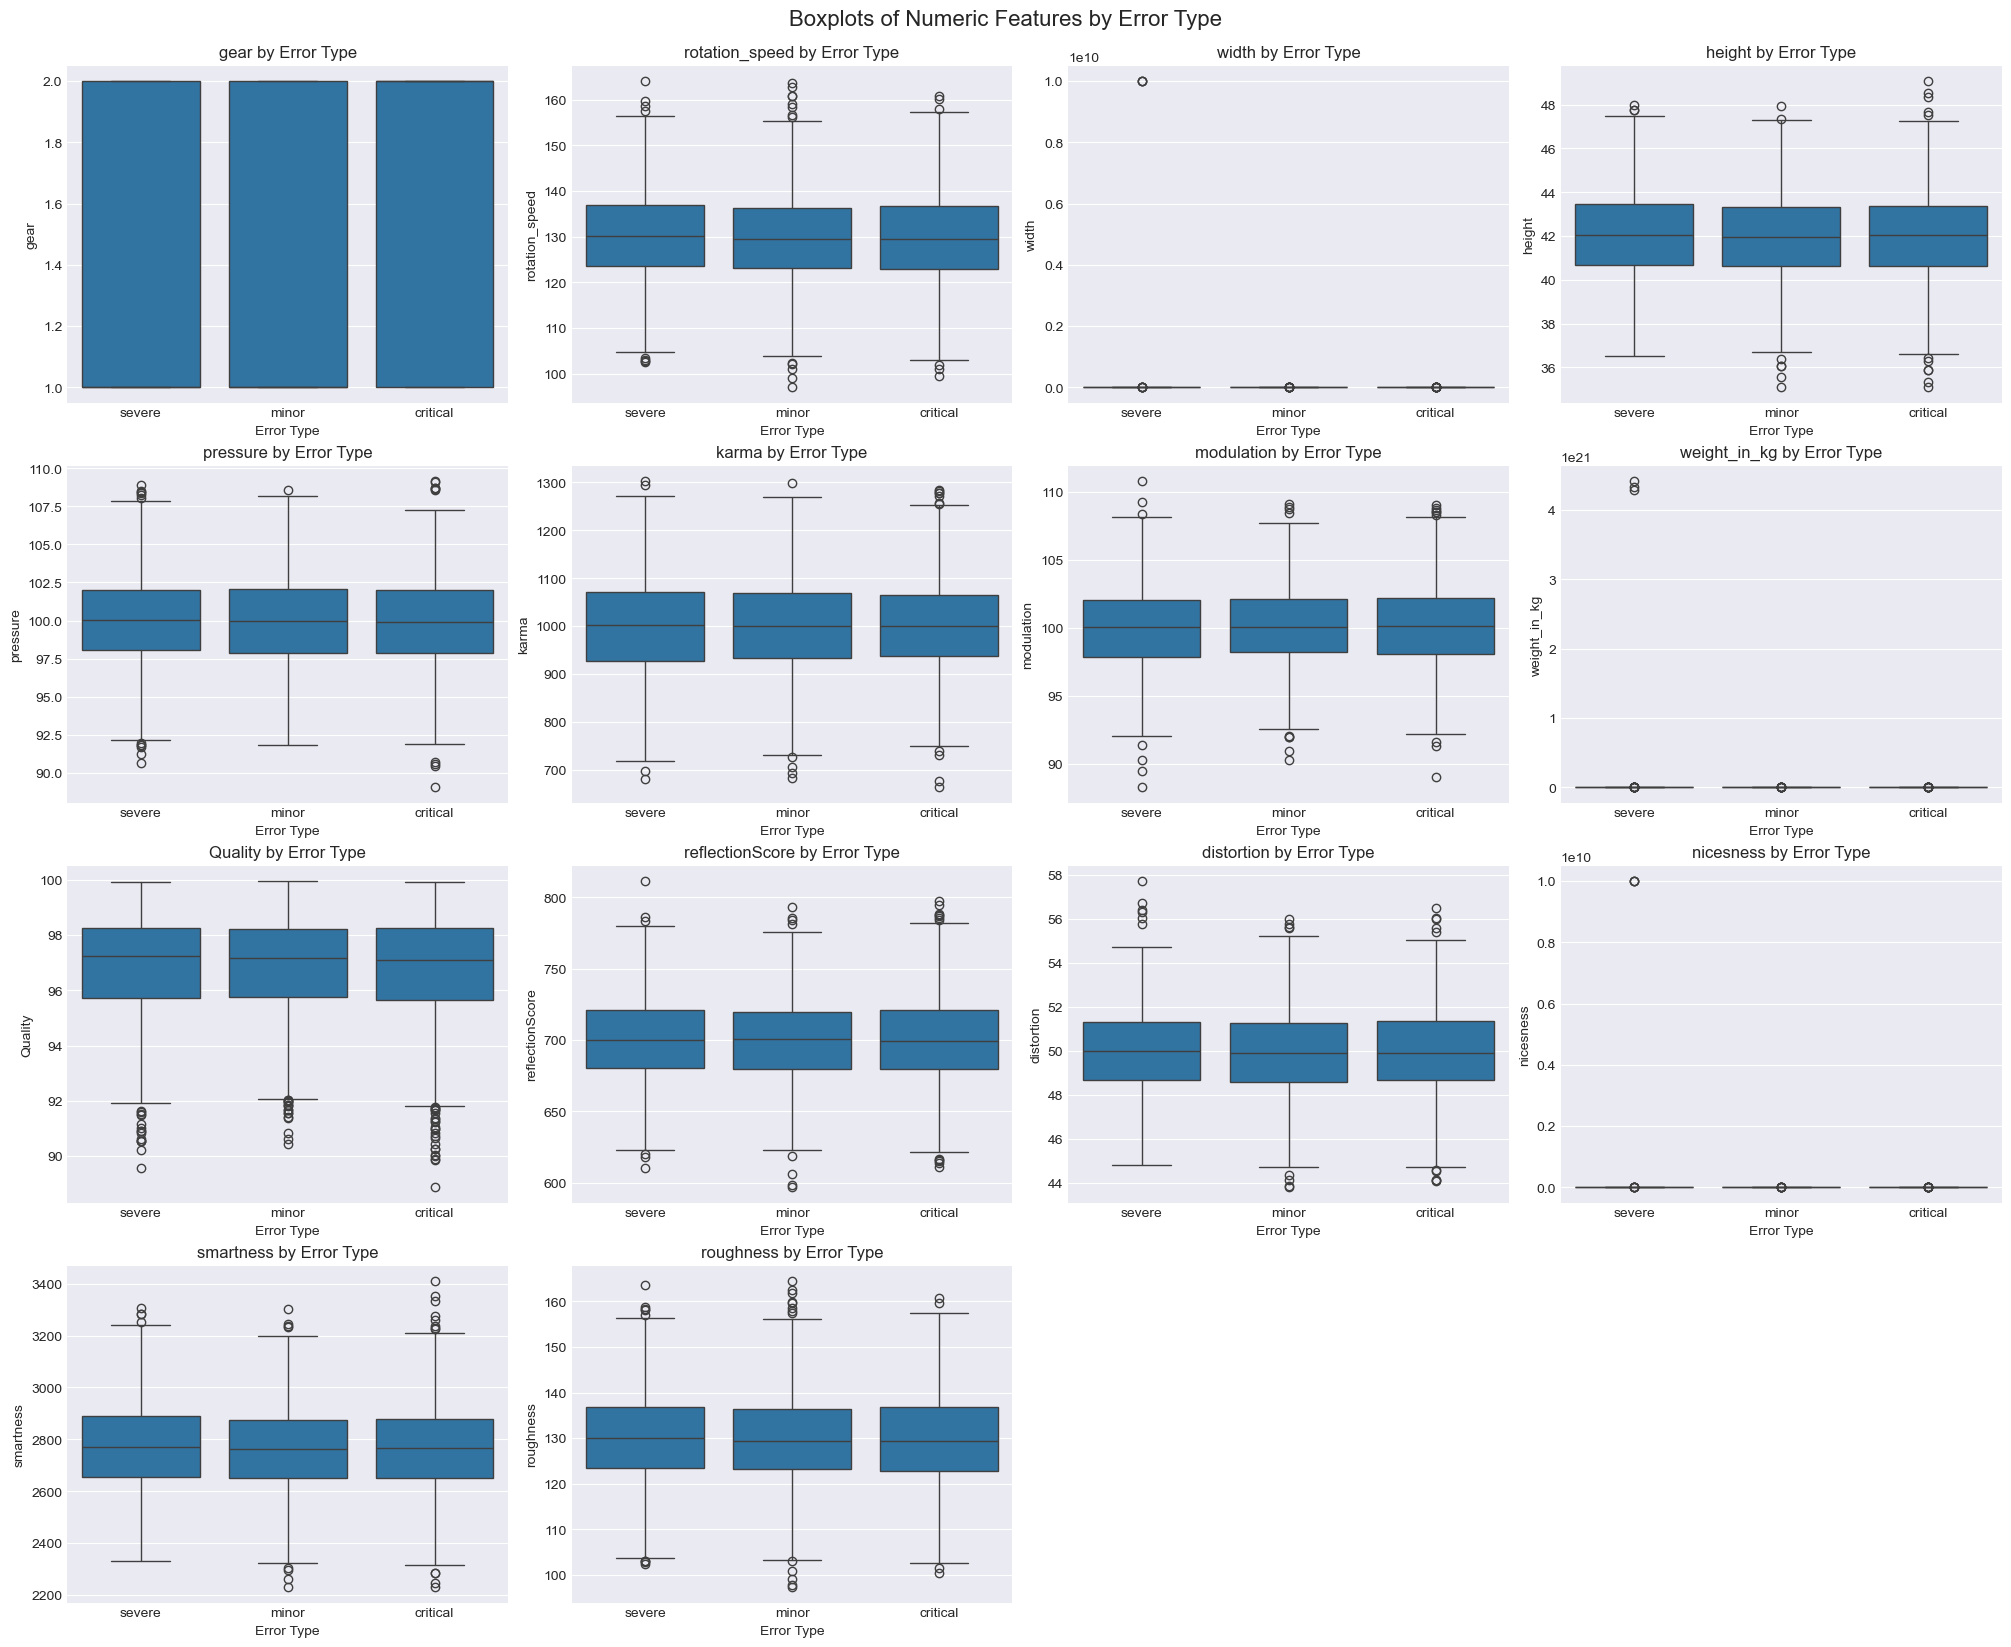

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['gear', 'rotation_speed', 'width', 'height', 'pressure', 'karma', 
                'modulation', 'weight_in_kg', 'Quality', 'reflectionScore', 'distortion', 'nicesness', 'smartness', 'roughness']

# Convert columns to numeric (ignore errors)
for col in numeric_cols:
    errors_df[col] = pd.to_numeric(errors_df[col], errors='coerce')

n_cols = 4  # Number of boxplots per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4), constrained_layout=True)

for idx, col in enumerate(numeric_cols):
    r, c = divmod(idx, n_cols)
    ax = axes[r, c] if n_rows > 1 else axes[c]
    sns.boxplot(x='error_type', y=col, data=errors_df, ax=ax)
    ax.set_title(f'{col} by Error Type')
    ax.set_xlabel('Error Type')
    ax.set_ylabel(col)

# Hide any unused subplots
for idx in range(len(numeric_cols), n_rows * n_cols):
    r, c = divmod(idx, n_cols)
    fig.delaxes(axes[r, c] if n_rows > 1 else axes[c])

plt.suptitle('Boxplots of Numeric Features by Error Type', y=1.02, fontsize=16)
plt.show()


# ML Model - Random Forest  

In [16]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns in merged_df
cat_cols = merged_df.select_dtypes(include=['object', 'category']).columns.tolist()
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    merged_df[col] = le.fit_transform(merged_df[col].astype(str))
    le_dict[col] = le

# Apply the same encoders to errors_df
for col in cat_cols:
    errors_df[col] = le_dict[col].transform(errors_df[col].astype(str))


/var/folders/lj/36924lnj39380jwmbklmk4hh0000gn/T/ipykernel_2431/1565714532.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors_df[col] = le_dict[col].transform(errors_df[col].astype(str))
/var/folders/lj/36924lnj39380jwmbklmk4hh0000gn/T/ipykernel_2431/1565714532.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors_df[col] = le_dict[col].transform(errors_df[col].astype(str))
/var/folders/lj/36924lnj39380jwmbklmk4hh0000gn/T/ipykernel_2431/1565714532.py:13: SettingWithCopyWarning: 
A value is tr

In [30]:
    # Remove non-feature columns if needed (e.g., IDs)
feature_cols = [col for col in merged_df.columns if col not in ['error_type', 'configuration_log_ID','id', 'error']]
target_col = 'error_type'


In [31]:
from sklearn.model_selection import train_test_split

X = merged_df[feature_cols]
y = merged_df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Classification report (All data):")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification report (All data):
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1327
           1       0.29      0.31      0.30       237
           2       0.30      0.27      0.28       220
           3       0.31      0.30      0.30       216

    accuracy                           0.73      2000
   macro avg       0.46      0.46      0.46      2000
weighted avg       0.72      0.73      0.73      2000

Confusion Matrix:
[[1261   27   15   24]
 [  35   74   68   60]
 [  25   76   59   60]
 [  23   75   54   64]]


In [33]:
# Train only on error records
X_err = errors_df[feature_cols]
y_err = errors_df[target_col]
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_err, y_err, test_size=0.2, random_state=42, stratify=y_err)

rf_error = RandomForestClassifier(n_estimators=100, random_state=42)
rf_error.fit(X_train_e, y_train_e)

# Evaluate on error records
y_pred_err = rf_error.predict(X_test_e)
print("Classification report (Error-only training, error records):")
print(classification_report(y_test_e, y_pred_err))

# Evaluate error-only model on ALL test data
y_pred_on_all = rf_error.predict(X_test)
print("Error-only model evaluated on ALL test data:")
print(classification_report(y_test, y_pred_on_all))


Classification report (Error-only training, error records):
              precision    recall  f1-score   support

           1       0.37      0.43      0.40       237
           2       0.29      0.29      0.29       220
           3       0.31      0.25      0.28       216

    accuracy                           0.33       673
   macro avg       0.32      0.33      0.32       673
weighted avg       0.32      0.33      0.33       673

Error-only model evaluated on ALL test data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1327
           1       0.26      0.90      0.41       237
           2       0.30      0.85      0.44       220
           3       0.33      0.86      0.47       216

    accuracy                           0.29      2000
   macro avg       0.22      0.65      0.33      2000
weighted avg       0.10      0.29      0.15      2000



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
# Get human-readable class labels for error_type
if 'error_type' in le_dict:
    class_labels = list(le_dict['error_type'].classes_)
else:
    # Fallback: Try to infer unique classes from your data if encoder missing
    class_labels = sorted(merged_df['error_type'].unique())
print("Class label mapping:", dict(zip(range(len(class_labels)), class_labels)))


Class label mapping: {0: 'No Error', 1: 'critical', 2: 'minor', 3: 'severe'}


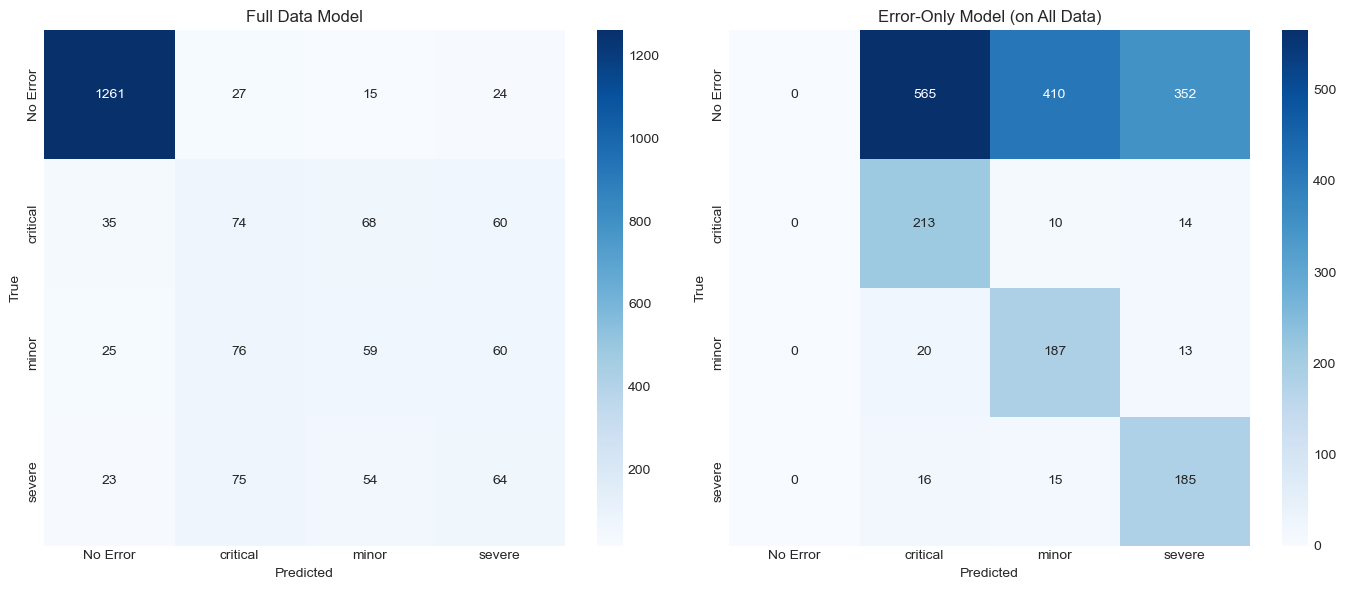

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Full Data Model
cm_full = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_full, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels, ax=axes[0])
axes[0].set_title('Full Data Model')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Error-Only Model on All Data
cm_err = confusion_matrix(y_test, y_pred_on_all)
sns.heatmap(cm_err, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels, ax=axes[1])
axes[1].set_title('Error-Only Model (on All Data)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()


/var/folders/lj/36924lnj39380jwmbklmk4hh0000gn/T/ipykernel_2431/1102015807.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(20), x='Importance', y='Feature', palette='viridis')


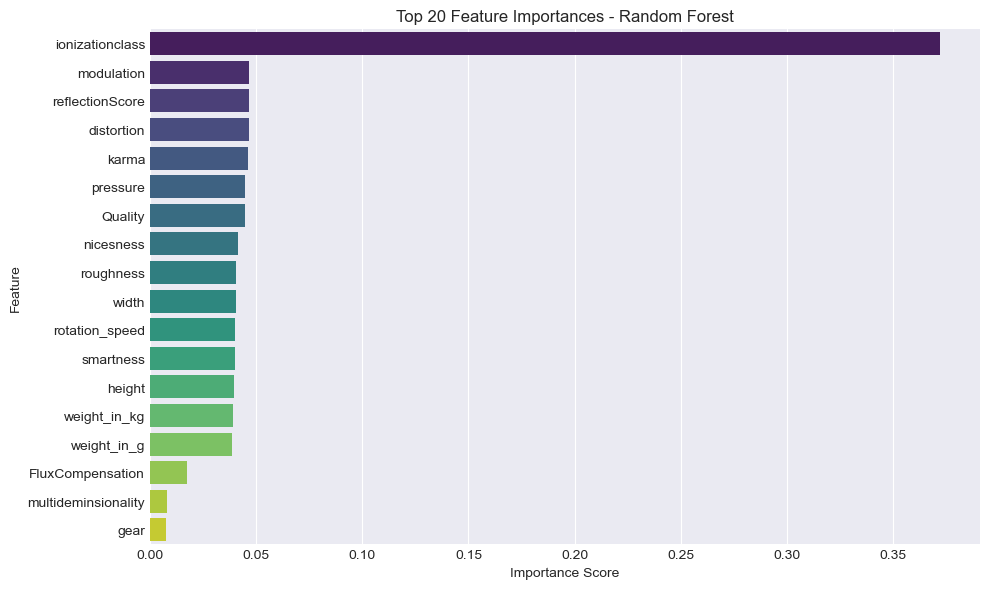

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
importances = rf.feature_importances_
features = X_train.columns

# Create a DataFrame for easier sorting and plotting
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title('Top 20 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [52]:
# Identify features with importance below threshold
threshold = 0.01
low_importance_features = feat_imp_df[feat_imp_df['Importance'] < threshold]['Feature'].tolist()
print("Features to consider dropping:", low_importance_features)

# Exclude them in future model runs
selected_features = [f for f in feature_cols if f not in low_importance_features]


Features to consider dropping: ['multideminsionality']


# ML Model with Less feture columns - Random Forest Classifier

In [57]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns in merged_df
cat_cols = merged_df.select_dtypes(include=['object', 'category']).columns.tolist()
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    merged_df[col] = le.fit_transform(merged_df[col].astype(str))
    le_dict[col] = le

# Apply the same encoders to errors_df
for col in cat_cols:
    errors_df[col] = le_dict[col].transform(errors_df[col].astype(str))


In [58]:
    # Remove non-feature columns if needed (e.g., IDs)
feature_cols = [col for col in merged_df.columns if col not in ['error_type', 'configuration_log_ID','id', 'error', 
                'weight_in_kg','FluxCompensation','gear','multideminsionality','pressure', 'Quality', 'weight_in_g', 
                'width', 'roughness', 'nicesness', 'height', 'rotation_speed', 'smartness', 'multideminsionality']]
target_col = 'error_type'


In [59]:
from sklearn.model_selection import train_test_split

X = merged_df[feature_cols]
y = merged_df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Classification report (All data):")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification report (All data):
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1327
           1       0.30      0.30      0.30       237
           2       0.32      0.32      0.32       220
           3       0.34      0.32      0.33       216

    accuracy                           0.74      2000
   macro avg       0.47      0.47      0.47      2000
weighted avg       0.73      0.74      0.73      2000

Confusion Matrix:
[[1262   23   24   18]
 [  36   70   68   63]
 [  25   75   70   50]
 [  23   65   59   69]]


In [61]:
# Train only on error records
X_err = errors_df[feature_cols]
y_err = errors_df[target_col]
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_err, y_err, test_size=0.2, random_state=42, stratify=y_err)

rf_error = RandomForestClassifier(n_estimators=100, random_state=42)
rf_error.fit(X_train_e, y_train_e)

# Evaluate on error records
y_pred_err = rf_error.predict(X_test_e)
print("Classification report (Error-only training, error records):")
print(classification_report(y_test_e, y_pred_err))

# Evaluate error-only model on ALL test data
y_pred_on_all = rf_error.predict(X_test)
print("Error-only model evaluated on ALL test data:")
print(classification_report(y_test, y_pred_on_all))


Classification report (Error-only training, error records):
              precision    recall  f1-score   support

           1       0.34      0.37      0.35       237
           2       0.31      0.31      0.31       220
           3       0.33      0.30      0.32       216

    accuracy                           0.33       673
   macro avg       0.33      0.33      0.33       673
weighted avg       0.33      0.33      0.33       673

Error-only model evaluated on ALL test data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1327
           1       0.27      0.89      0.41       237
           2       0.30      0.88      0.45       220
           3       0.31      0.83      0.45       216

    accuracy                           0.29      2000
   macro avg       0.22      0.65      0.33      2000
weighted avg       0.10      0.29      0.15      2000



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [62]:
# Get human-readable class labels for error_type
if 'error_type' in le_dict:
    class_labels = list(le_dict['error_type'].classes_)
else:
    # Fallback: Try to infer unique classes from your data if encoder missing
    class_labels = sorted(merged_df['error_type'].unique())
print("Class label mapping:", dict(zip(range(len(class_labels)), class_labels)))


Class label mapping: {0: 0, 1: 1, 2: 2, 3: 3}


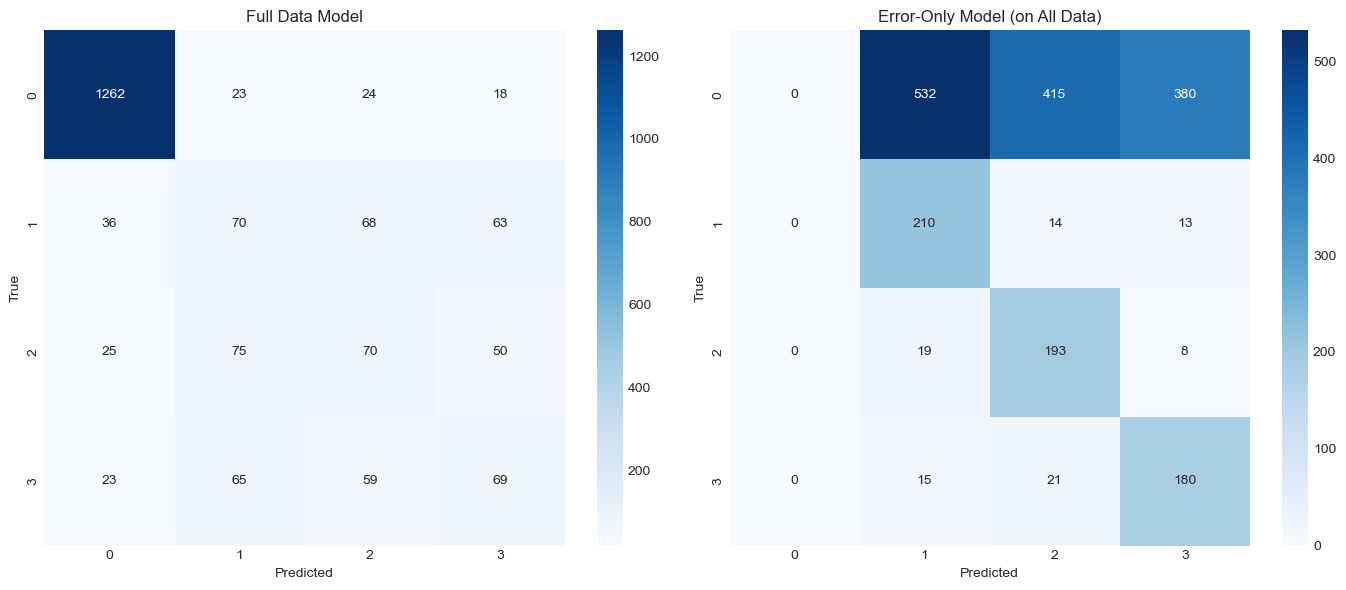

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Full Data Model
cm_full = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_full, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels, ax=axes[0])
axes[0].set_title('Full Data Model')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Error-Only Model on All Data
cm_err = confusion_matrix(y_test, y_pred_on_all)
sns.heatmap(cm_err, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels, ax=axes[1])
axes[1].set_title('Error-Only Model (on All Data)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()


/var/folders/lj/36924lnj39380jwmbklmk4hh0000gn/T/ipykernel_2431/1102015807.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(20), x='Importance', y='Feature', palette='viridis')


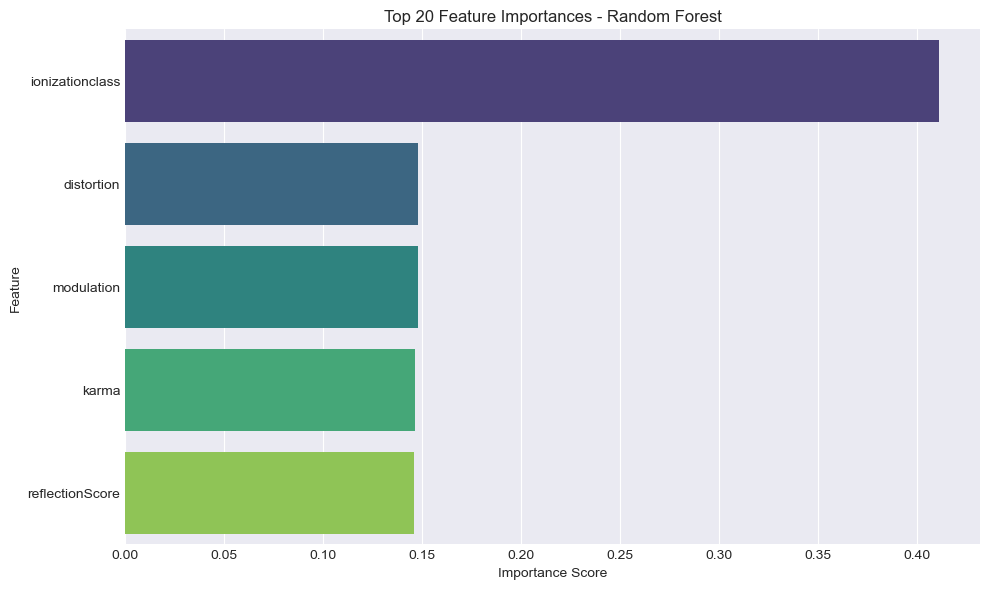

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
importances = rf.feature_importances_
features = X_train.columns

# Create a DataFrame for easier sorting and plotting
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title('Top 20 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [68]:
# Identify features with importance below threshold
threshold = 0.15
low_importance_features = feat_imp_df[feat_imp_df['Importance'] < threshold]['Feature'].tolist()
print("Features to consider dropping:", low_importance_features)

# Exclude them in future model runs
selected_features = [f for f in feature_cols if f not in low_importance_features]


Features to consider dropping: ['distortion', 'modulation', 'karma', 'reflectionScore']
